In [1]:
import os, shutil
original_dataset_dir = 'F:\\Downloads\\train\\train'
base_dir = 'F:\\Downloads\\cats_and_dogs_small'
os.mkdir(base_dir)

In [2]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [3]:
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [4]:
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

In [6]:
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [7]:
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [8]:
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

In [9]:
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [10]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# setting the validation data equal to 500
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [14]:
#setting the training data to 1000 pictures
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
#setting the validation data equal to 500 sample
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# setting test data equal to 500 samples
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
from keras import layers
from keras import models


C:\Users\omar\Anaconda31\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [17]:
from keras import optimizers
# we use binary_crossentropy as we only have two casses here
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator
# setting the data of the images between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# batch size is the number of samples running at a time
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150) ,batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150), batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# We have to check that data and labels are having the same shape
for data_batch,labels_batch in train_generator:
    print('data batch shape is',data_batch.shape)
    print('labels batch shape is',labels_batch.shape)
    break

data batch shape is (20, 150, 150, 3)
labels batch shape is (20,)


In [20]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 194s 2s/step - loss: 0.6873 - acc: 0.5360 - val_loss: 0.6708 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 188s 2s/step - loss: 0.6534 - acc: 0.6120 - val_loss: 0.6397 - val_acc: 0.6510
Epoch 3/30
100/100 [==============================] - 183s 2s/step - loss: 0.6092 - acc: 0.6735 - val_loss: 0.6110 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 180s 2s/step - loss: 0.5692 - acc: 0.7110 - val_loss: 0.5949 - val_acc: 0.6890
Epoch 5/30
100/100 [==============================] - 183s 2s/step - loss: 0.5326 - acc: 0.7325 - val_loss: 0.5831 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 185s 2s/step - loss: 0.5028 - acc: 0.7440 - val_loss: 0.5765 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 189s 2s/step - loss: 0.4866 - acc: 0.7690 - val_loss: 0.5652 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 184s 2s/step - 

In [21]:
model.save('cats_and_dogs_small_2.h5')

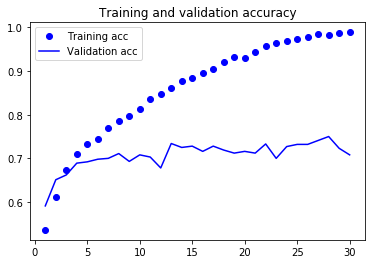

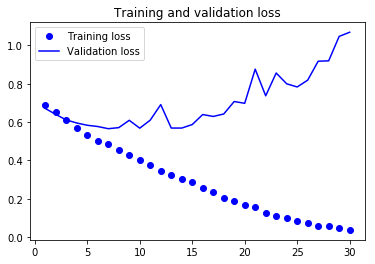

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
# we realize here that the accuracy stops improving after 7th epoch
# so we will use data augmentation to mitigate overfitting
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
if i % 4 == 0:
    break
plt.show()